<a href="https://colab.research.google.com/github/Durba01/Natural-Language-Processing-/blob/Natural_language_processing/Natural_Language__Processing_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check for GPU 
!nvidia-smi

Sat Feb 12 02:20:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**GET HELPER FUNCTIONS**

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-02-12 02:20:02--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-02-12 02:20:02 (80.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

**DOWNLOAD A TEXT DATASET**

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2022-02-12 02:20:06--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 142.250.99.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2022-02-12 02:20:06 (47.2 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# unzip the data
unzip_data("nlp_getting_started.zip")

In [ ]:
# Turn .csv files into pandas DataFrame's
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# The test data doesn't have a target (that's what we'd try to predict)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total sample: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total sample: 10876


In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
ExOfficio Men's Boxer Brief Curfew Large http://t.co/acb0ryeNuo

---

Target: 0 (not real disaster)
Text:
Max blew tf up ! ?????? shots fired ???? #CatfishMTV

---

Target: 0 (not real disaster)
Text:
@bekah__w thanks! I sweat bullets every time I get in with this blazing sun beating down on me.

---

Target: 0 (not real disaster)
Text:
Purple Heart Vet Finds Jihad Threat on His Car at Mall: ÛÏAll of you Islamaphobe vets... http://t.co/hWnyXXKczz

---

Target: 0 (not real disaster)
Text:
I PUT MY CHICKEN NUGGETS IN THE MICROWAVE FOR 5 MINUTES INTEAD OF 1 ON ACCIDENT AND THEY FUCKING BURNED

---



**SPLIT THE DATA INTO TRAINING AND VALIDATION SET**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# View the first 10 training sentences and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

**TEXT VECTORIZATION (TOKENIZATION)**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams=None,
                                    output_mode = "int",
                                    output_sequence_length = None)

In [ ]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization with custom variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length= max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
@tweetingLew @tersestuff 

Notley flattened Harper IN HIS Heartland
Harper Imported tens of thousands of TFW slaves COST ALBERTANS JOBS      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[7290, 7707,    1,  485, 3788,    4,   79,    1, 3788, 3748, 4447,
           6,  981,    6, 7693]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


**Creating an Embedding using an Embedding Layer**

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length,
                             name="embeding_1")

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Asbury Park shooting reported http://t.co/dADZ5ZFO1g via @AsburyParkPress      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03977952, -0.03782602, -0.03646283, ...,  0.00236253,
          0.03332629,  0.02803668],
        [ 0.00533236, -0.02016134,  0.01358488, ...,  0.03528377,
          0.00732958,  0.04053763],
        [ 0.04688198,  0.01387297,  0.04794154, ...,  0.01035218,
         -0.03818122, -0.01432575],
        ...,
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097],
        [ 0.01645621, -0.00589932, -0.01471175, ..., -0.02511839,
          0.00912381, -0.00024097]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03977952, -0.03782602, -0.03646283, -0.02449075, -0.00015752,
        0.02220254,  0.00162981,  0.00603487,  0.0085157 , -0.02620113,
        0.04101599,  0.03715892,  0.02397566,  0.00281113, -0.02704906,
       -0.04870148,  0.01457943,  0.0059551 , -0.02334484,  0.03581132,
        0.04377897,  0.04186075,  0.03245703, -0.045092  ,  0.04260418,
        0.03398135, -0.01812425, -0.03539513,  0.02954218,  0.02556742,
       -0.03345481,  0.04272738, -0.00798845, -0.0406163 , -0.00644834,
        0.00232404,  0.01703629,  0.03645121, -0.02622857,  0.03498118,
       -0.03059715,  0.02576998, -0.04221511,  0.02654583, -0.02192564,
       -0.0346157 ,  0.00075326,  0.01427345,  0.01027539, -0.04311384,
       -0.03973336, -0.00966626,  0.01032177, -0.04011822, -0.018892  ,
       -0.01233201,  0.02721632, -0.01232889, -0.02504088, -0.04715574,
        0.00558523, -0.00801403,  0.03058865, -0.01923352, -0.04175536,
       -0.036542

More specifically, we'll be building the following:

Model 0: Naive Bayes (baseline)

Model 1: Feed-forward neural network (dense model)

Model 2: LSTM model

Model 3: GRU model

Model 4: Bidirectional-LSTM model

Model 5: 1D Convolutional Neural Network

Model 6: TensorFlow Hub Pretrained Feature Extractor

Model 7: Same as model 6 with 10% of training data

Each experiment will go through the following steps:

Construct the model

Train the model

Make predictions with the model

Track prediction evaluation metrics for later comparison

**MODEL 0: Getting a Baseline**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()),
                    ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f" our baseline model achieved an accuracy of: {baseline_score*100:.2f}%")

 our baseline model achieved an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

**Creating an evaluation function for our model experiments**

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """Calculate model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  y_true = true labels in the form of 1D array
  y_pred = predicted labels in the form of 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Caculate a model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

**Model 1: A simple dense model**

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# compile model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# get the summary
model_1.summary() # Note what the Globalavergae pooling layer doing

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1_history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220212-022013
Epoch 1/5
215/215 [==============================] - 5s 9ms/step - loss: 0.6094 - accuracy: 0.6916 - val_loss: 0.5357 - val_accuracy: 0.7572
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4410 - accuracy: 0.8189 - val_loss: 0.4691 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3463 - accuracy: 0.8605 - val_loss: 0.4590 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2848 - accuracy: 0.8923 - val_loss: 0.4641 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2380 - accuracy: 0.9118 - val_loss: 0.4767 - val_accuracy: 0.7874


In [ ]:
# check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.7874


[0.4766846001148224, 0.787401556968689]

In [ ]:
embedding.weights

[<tf.Variable 'embeding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.00073163,  0.015048  , -0.03425452, ..., -0.0440354 ,
         -0.01042281,  0.01876437],
        [ 0.04135865, -0.03945083, -0.03811941, ...,  0.00464736,
          0.03163552,  0.02928298],
        [ 0.00684033,  0.05363132, -0.00241556, ..., -0.07082177,
         -0.04750705,  0.01448254],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.00692343,  0.05942352, -0.01975194, ..., -0.06199061,
         -0.01018393,  0.03510419],
        [-0.0372346 ,  0.06267187, -0.07451147, ..., -0.02367218,
         -0.0864333 ,  0.01742155]], dtype=float32)>]

In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

array([[0.40488204],
       [0.7443312 ],
       [0.997895  ],
       [0.10889999],
       [0.11143529],
       [0.93556094],
       [0.9134595 ],
       [0.9925345 ],
       [0.97156817],
       [0.26570338]], dtype=float32)

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
# calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                  y_pred = model_1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7846966492209201,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

**VISUALIZING LEARNED EMBEDDINGS**

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embeding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


In [ ]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**RECURRENT NEURAL NETWORK**

**LSTM**

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
from tensorflow.keras import layers

tf.random.set_seed(42)

inputs = layers.Input( shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences= True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data = (val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220212-022029
Epoch 1/5
215/215 [==============================] - 9s 10ms/step - loss: 0.2249 - accuracy: 0.9213 - val_loss: 0.5445 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1651 - accuracy: 0.9394 - val_loss: 0.5973 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1293 - accuracy: 0.9521 - val_loss: 0.7398 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1097 - accuracy: 0.9577 - val_loss: 0.8955 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0826 - accuracy: 0.9663 - val_loss: 0.9671 - val_accuracy: 0.7769


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[2.4632378e-03],
       [4.9080303e-01],
       [9.9990511e-01],
       [4.8024226e-02],
       [6.7428598e-05],
       [9.9896145e-01],
       [8.6847186e-01],
       [9.9995112e-01],
       [9.9990356e-01],
       [4.0801626e-01]], dtype=float32)

In [ ]:
# convert model_2 pred_probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate resuls
model_2_results = calculate_results(y_true=val_labels,
                                   y_pred = model_2_preds)
model_2_results

{'accuracy': 77.69028871391076,
 'f1': 0.7734519762210931,
 'precision': 0.7822241302284023,
 'recall': 0.7769028871391076}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

**GRU**

In [ ]:
from os import access
from tensorflow.python.keras import activations
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.GRU(64, return_sequences=True)(x)
#x = layers.LSTM(42, return_sequences=True)(x)
x = layers.GRU(64)(x)
#x= layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="mode_3_GRU")

In [ ]:
model_3.summary()

Model: "mode_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
______________________________________________

In [ ]:
# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20220212-022045
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1600 - accuracy: 0.9383 - val_loss: 0.6425 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0887 - accuracy: 0.9685 - val_loss: 0.7891 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0733 - accuracy: 0.9714 - val_loss: 1.0564 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0669 - accuracy: 0.9736 - val_loss: 1.0411 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0533 - accuracy: 0.9759 - val_loss: 1.1502 - val_accuracy: 0.7795


In [ ]:
# make predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[7.9445457e-03],
       [6.4843464e-01],
       [9.9970740e-01],
       [1.1032371e-01],
       [1.0200402e-04],
       [9.9967551e-01],
       [5.7289100e-01],
       [9.9994230e-01],
       [9.9987042e-01],
       [9.3665385e-01]], dtype=float32)

In [ ]:
# convert model_3_pred_probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [ ]:
# calculate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred = model_3_preds)

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

**Model 4: Bidirectonal RNN model**

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# fit the model
model_4.fit(train_sentences,
            train_labels,
            validation_data = (val_sentences, val_labels),
            epochs = 5, 
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20220212-022058
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.1148 - accuracy: 0.9628 - val_loss: 0.9392 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0562 - accuracy: 0.9766 - val_loss: 1.1729 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0465 - accuracy: 0.9783 - val_loss: 1.3711 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0456 - accuracy: 0.9787 - val_loss: 1.2810 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0400 - accuracy: 0.9804 - val_loss: 1.5599 - val_accuracy: 0.7717


In [ ]:
# make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[2.7044333e-04],
       [6.0960895e-01],
       [9.9997592e-01],
       [1.6082093e-01],
       [6.4951864e-06],
       [9.9980468e-01],
       [7.9920596e-01],
       [9.9998975e-01],
       [9.9998569e-01],
       [9.2274159e-01]], dtype=float32)

In [ ]:
# convert pred_probs to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# calculate the results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred = model_4_preds)
model_4_results                                  

{'accuracy': 77.16535433070865,
 'f1': 0.7697096359746837,
 'precision': 0.773049502603257,
 'recall': 0.7716535433070866}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

### **Model 5: Conv1D**

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D() 
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
# create 1-dimensional convolutional layer to model sequence
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters = 64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1D")

In [ ]:
# compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embeding_1 (Embedding)      (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)              

In [ ]:
# fit the model
model_5.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "conv1D")])

Saving TensorBoard log files to: model_logs/conv1D/20220212-022117
Epoch 1/5
215/215 [==============================] - 2s 5ms/step - loss: 0.1227 - accuracy: 0.9607 - val_loss: 0.8758 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0738 - accuracy: 0.9726 - val_loss: 1.0464 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0619 - accuracy: 0.9755 - val_loss: 1.1004 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0554 - accuracy: 0.9777 - val_loss: 1.1931 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0505 - accuracy: 0.9778 - val_loss: 1.2416 - val_accuracy: 0.7625


In [ ]:
# make predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[8.0083117e-02],
       [6.3075864e-01],
       [9.9993384e-01],
       [8.2802951e-02],
       [1.1204897e-07],
       [9.9531651e-01],
       [9.6027666e-01],
       [9.9998236e-01],
       [9.9999976e-01],
       [8.0636406e-01]], dtype=float32)

In [ ]:
# convert the pred_probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# evaluat ethe results
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred = model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'f1': 0.7609952154742672,
 'precision': 0.7628028463824278,
 'recall': 0.7624671916010499}

In [ ]:
# baseline results
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

**Model 6: TensorFlow Hub Pretrained Sentence Encoder**

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157032  0.02485909  0.02878048 -0.01271501  0.03971539  0.0882776
  0.02680985  0.05589837 -0.0106873  -0.00597291  0.00639325 -0.0181952
  0.00030816  0.09105889  0.05874643 -0.03180627  0.01512473 -0.05162929
  0.00991365 -0.06865346 -0.04209305  0.02678981  0.03011008  0.00321067
 -0.0033797  -0.04787361  0.02266722 -0.00985925 -0.04063613 -0.0129209
 -0.04666385  0.056303   -0.03949255  0.00517688  0.02495828 -0.07014443
  0.02871508  0.04947681 -0.00633976 -0.08960193  0.02807116 -0.00808363
 -0.01360604  0.0599865  -0.10361787 -0.05195372  0.00232956 -0.02332528
 -0.03758106  0.03327731], shape=(50,), dtype=float32)


In [ ]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layers = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                         trainable=False,
                                         input_shape=[],
                                         dtype=tf.string,
                                         name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layers,
                               layers.Dense(1, activation="sigmoid")
], name="Model_6_USE")

In [ ]:
# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_6.summary()

Model: "Model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256,798,337
Trainable params: 513
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# fit the model
history_6 = model_6.fit(train_sentences,
                        train_labels,
                        validation_data = (val_sentences, val_labels),
                        epochs=5,
                        callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                               "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220212-022148
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.6507 - accuracy: 0.7330 - val_loss: 0.6166 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5829 - accuracy: 0.7879 - val_loss: 0.5663 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5394 - accuracy: 0.7946 - val_loss: 0.5340 - val_accuracy: 0.7848
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.5104 - accuracy: 0.7986 - val_loss: 0.5125 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4901 - accuracy: 0.7994 - val_loss: 0.4977 - val_accuracy: 0.7861


In [ ]:
# make predictions
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.38315612],
       [0.68634063],
       [0.84563947],
       [0.32969236],
       [0.6322885 ],
       [0.72941893],
       [0.8188752 ],
       [0.83429396],
       [0.7593016 ],
       [0.19837517]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate model_6 results
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred = model_6_preds)
model_6_results

{'accuracy': 78.60892388451444,
 'f1': 0.78486500301026,
 'precision': 0.7866474744348231,
 'recall': 0.7860892388451444}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
# create another model with more neuron units to beat the baseline
model_7 = tf.keras.Sequential([
                               sentence_encoder_layers,
                               layers.Dense(64, activation="relu"),
                               layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_USE")

In [ ]:
# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model
model_7.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data = (val_sentences, val_labels),
            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                     "tf_hub_sentence_encoder_2")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_2/20220212-022212
Epoch 1/5
215/215 [==============================] - 4s 13ms/step - loss: 0.5018 - accuracy: 0.7848 - val_loss: 0.4493 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4142 - accuracy: 0.8149 - val_loss: 0.4373 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3998 - accuracy: 0.8225 - val_loss: 0.4330 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 2s 12ms/step - loss: 0.3927 - accuracy: 0.8260 - val_loss: 0.4284 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3866 - accuracy: 0.8297 - val_loss: 0.4303 - val_accuracy: 0.8136


In [ ]:
# make predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.14769651],
       [0.7465535 ],
       [0.9881215 ],
       [0.20422187],
       [0.7348991 ],
       [0.6843027 ],
       [0.9817572 ],
       [0.97650343],
       [0.9291062 ],
       [0.08620185]], dtype=float32)

In [ ]:
# predictions conversion to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true = val_labels,
                                    y_pred = model_7_preds)
model_7_results

{'accuracy': 81.36482939632546,
 'f1': 0.8120618868299143,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ### 

In [ ]:
# Create subsets of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [ ]:
# check the number of target in our subset of data
train_10_percent["target"].value_counts()

0    413
1    348
Name: target, dtype: int64

In [ ]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# Lets build a model same as model 8 by cloning 

model_8 = tf.keras.models.clone_model(model_7)

# compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# get a summary of the model
model_8.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# fit the model
history_8 = model_8.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                   "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220212-022230
Epoch 1/5
24/24 [==============================] - 3s 36ms/step - loss: 0.6655 - accuracy: 0.7057 - val_loss: 0.6262 - val_accuracy: 0.7940
Epoch 2/5
24/24 [==============================] - 1s 24ms/step - loss: 0.5916 - accuracy: 0.7963 - val_loss: 0.5476 - val_accuracy: 0.7887
Epoch 3/5
24/24 [==============================] - 1s 24ms/step - loss: 0.5166 - accuracy: 0.7924 - val_loss: 0.4813 - val_accuracy: 0.7966
Epoch 4/5
24/24 [==============================] - 1s 24ms/step - loss: 0.4619 - accuracy: 0.8029 - val_loss: 0.4374 - val_accuracy: 0.8163
Epoch 5/5
24/24 [==============================] - 1s 24ms/step - loss: 0.4261 - accuracy: 0.8173 - val_loss: 0.4075 - val_accuracy: 0.8215


In [ ]:
# make predictions
model_8_pred_probs = model_8.predict(val_sentences)
model_8_pred_probs[:10]

array([[0.22837698],
       [0.8233908 ],
       [0.91493   ],
       [0.30656067],
       [0.82942426],
       [0.8548243 ],
       [0.91128486],
       [0.94403434],
       [0.8477666 ],
       [0.0727288 ]], dtype=float32)

In [ ]:
# conversion of predictions to labels
model_8_preds = tf.squeeze(tf.round(model_8_pred_probs))
model_8_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# calculate the results 
model_8_results = calculate_results(y_true=val_labels,
                                    y_pred=model_8_preds)
model_8_results

{'accuracy': 82.1522309711286,
 'f1': 0.8212315565817431,
 'precision': 0.8213519964933961,
 'recall': 0.821522309711286}

In [ ]:
model_7_results

{'accuracy': 81.36482939632546,
 'f1': 0.8120618868299143,
 'precision': 0.8160661319598898,
 'recall': 0.8136482939632546}

**ATTENTION**

Model_8 results was trained on 10% of the data which was expected to have high accuracy compared to model_7 that was trained on the large dataset. these brought another point of observation which worth attention. what is it? and why?

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [ ]:
# making a better data split (no data leakages)
train_10_percent_split = int(0.1* len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
train_10_percent_split

685

In [ ]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# check the number of target in the subset of numbers
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

**Comparing the performance of each of our models**

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_sentence_encoder_2": model_7_results,
                                  "tf_hub_sentences_encoder": model_8_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.740157,0.791492,0.787402,0.784697
lstm,77.690289,0.782224,0.776903,0.773452
gru,77.952756,0.780242,0.779528,0.778108
bidirectional,77.165354,0.773050,0.771654,0.769710
conv1d,76.246719,0.762803,0.762467,0.760995
tf_hub_sentence_encoder,78.608924,0.786647,0.786089,0.784865
tf_hub_sentence_encoder_2,81.364829,0.816066,0.813648,0.812062
tf_hub_sentences_encoder,82.152231,0.821352,0.821522,0.821232


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

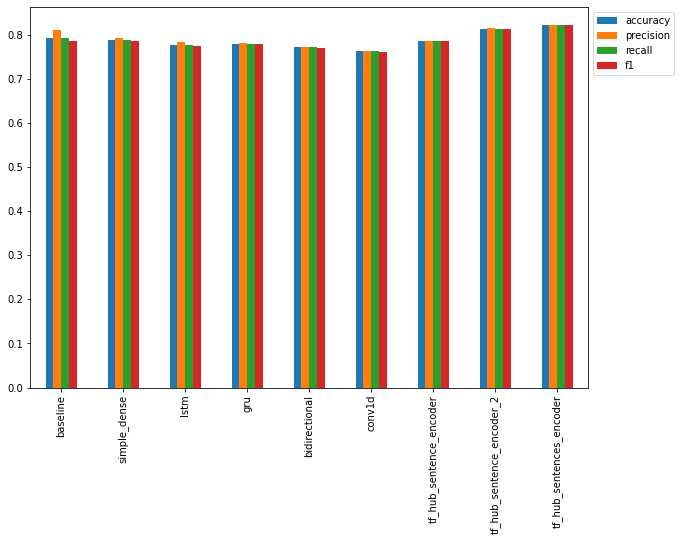

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

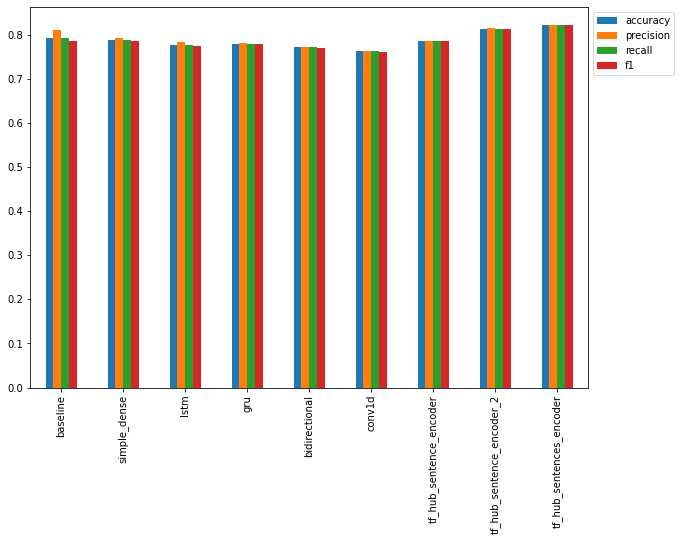

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

# **Saving and loading a trained model**

There are two main ways of saving a model in TensorFlow:

The HDF5 format.

The SavedModel format (default).

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_7.save("model_7.h5")

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_7 = tf.keras.models.load_model("model_7.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_7.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4303 - accuracy: 0.8136


[0.43028968572616577, 0.8136482834815979]

**Finding the most wrong examples**

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2022-02-12 02:22:46--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  72.2MB/s    in 11s     

2022-02-12 02:22:57 (84.6 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [ ]:
# import previously trained model from google storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")

In [ ]:
# evaluate the model
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [ ]:
# make predictions with loaded model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred_probs[:10]

array([[0.15975739],
       [0.747162  ],
       [0.98874855],
       [0.19622949],
       [0.7078078 ],
       [0.7096749 ],
       [0.98190695],
       [0.9810662 ],
       [0.94574374],
       [0.08504026]], dtype=float32)

In [ ]:
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
from tensorflow.python.eager.backprop import val_and_grad_function
# create dataframe with validation sentences 
val_df = pd.DataFrame({"text":val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})

val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Find the wrong predictions and sort by predictions probabilities 
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
...,...,...,...,...
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949


In [ ]:
most_wrong.head()

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213


In [ ]:
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043919
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, pred: {int(pred)}, prob: {prob}")
  print(f"Text:\n{text}\n")
  print("_ _ _ _ \n")

Target: 0, pred: 1, prob: 0.9101957678794861
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

_ _ _ _ 

Target: 0, pred: 1, prob: 0.8769820928573608
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

_ _ _ _ 

Target: 0, pred: 1, prob: 0.8523000478744507
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

_ _ _ _ 

Target: 0, pred: 1, prob: 0.8354544043540955
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

_ _ _ _ 

Target: 0, pred: 1, prob: 0.8272132873535156
Text:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

_ _ _ _ 

Target: 0, pred: 1, prob: 0.814815878868103
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the tow

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, pred: {int(pred)}, prob: {prob}")
  print(f"Text:\n{text}\n")
  print("_ _ _ _\n")

Target: 1, pred: 0, prob: 0.06730346381664276
Text:
@DavidVonderhaar At least you were sincere ??

_ _ _ _

Target: 1, pred: 0, prob: 0.05507579818367958
Text:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

_ _ _ _

Target: 1, pred: 0, prob: 0.054603397846221924
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

_ _ _ _

Target: 1, pred: 0, prob: 0.05459698289632797
Text:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

_ _ _ _

Target: 1, pred: 0, prob: 0.049637261778116226
Text:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

_ _ _ _

Target: 1, pred: 0, prob: 0.04391850158572197
Text:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

_ _ _ _

Target: 1, pred: 0, prob

# **Making predictions on the test dataset**

In [ ]:
# Making predictions on the test dataset
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

Pred: 0, Prob: 0.18434982001781464
Text:
@andreajmarkley @edjschenk @SenTedCruz If you call forward sinking into a cesspool you might be right

----

Pred: 0, Prob: 0.10250819474458694
Text:
It's a trap not a fucking game. U ain't trapping if u ain't trapped

----

Pred: 1, Prob: 0.5153577923774719
Text:
RN / Registered Nurse / ER / Emergency Room - Supplemental Health Care: (#Modesto California ) http://t.co/YiYspjLKZO #Nursing #Job #Jobs

----

Pred: 1, Prob: 0.7710301876068115
Text:
Shot 12 times. Found dead in cuffs after being involved in a car accident. Officers told ambulance not to treat him. https://t.co/MEUDJwaaNg

----

Pred: 1, Prob: 0.6538318991661072
Text:
How an anatomic mother helps up-to-the-minute remodeling high evacuation hospital: IaAvRoIV

----

Pred: 1, Prob: 0.5494518876075745
Text:
The horror community is deluged with cruddy ostensibly macabre photography. Don't contribute to the pandemic.

----

Pred: 0, Prob: 0.3224555552005768
Text:
PLUS PERFORMANCE CHIP FUE

# **The speed/score tradeoff**

In [ ]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentences) # find prediction time per sample
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

(0.22842889499952435, 0.0002997754527552813)

In [ ]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.02606590600044001, 3.4207225722362215e-05)

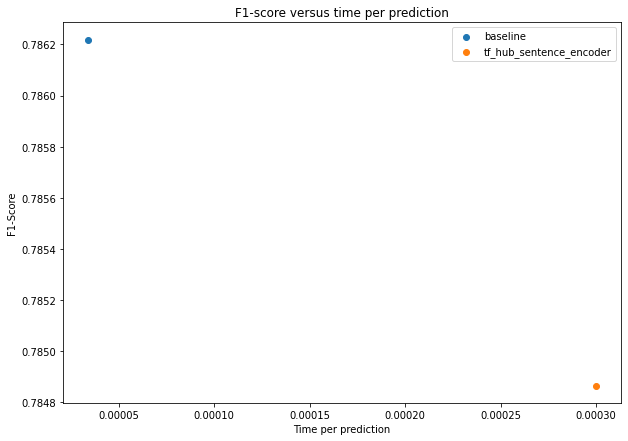

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");